In [1]:
require 'image'
require 'nn'
print('')

In [1]:
-- os.execute('wget -c https://s3.amazonaws.com/torch7/data/cifar10torchsmall.zip')
-- os.execute('unzip -o cifar10torchsmall.zip')

Archive:  cifar10torchsmall.zip


  inflating: cifar10-test.t7         

  inflating: cifar10-train.t7        

In [2]:
trainset = torch.load('cifar10-train.t7')
-- testset = torch.load('cifar10-test.t7')
classes = {'airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'}

In [3]:
print(trainset.data:size())
print(trainset.label:size())

 10000
     3
    32
    32
[torch.LongStorage of size 4]

 10000
[torch.LongStorage of size 1]



In [ ]:
-- itorch.image(trainset.data[2])
-- trainset.data[{1,3}]

label = trainset.data:type('torch.DoubleTensor')
label = label[{{1,300},{},{},{}}]
-- print(label:size())
-- print(label[{{1,2},{},{},{}}]:size())
-- print(label[{{1,300},{},{},{}}]:size())
-- print(label:size())

data = torch.Tensor(300,1,32,32)
for i=1,300 do
    data[i] = image.rgb2y(label[i])
end

mean = label:mean()
std = label:std()
label:add(-mean)
label:div(std)

mean = data:mean()
std = data:std()
data:add(-mean)
data:div(std)

print(label:size())
print(data:size())
-- print(label[1])
-- print(data[1])




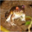

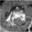

In [27]:

itorch.image(label[1])
itorch.image(data[1])

-- yuv = image.rgb2y(label[1])
-- print(yuv:size())

-- a = torch.rand(4,2,2)
-- b = torch.Tensor(2,2):fill(7)
-- a[1] = b
-- print(a)


In [5]:
-- l = data[{{1,2},{},{},{}}]
-- print(l:size())
-- m1 = nn.SpatialConvolution(1,9,3,3,2,2,1,1)
-- o1 = m1:forward(l)
-- print(o1:size())

-- m2 = nn.SpatialConvolution(9,18,3,3,2,2,1,1)
-- o2 = m2:forward(o1)
-- print(o2:size())

-- m3 = nn.SpatialFullConvolution(18, 18, 2, 2, 2, 2, 0, 0, 0, 0)
-- o3 = m3:forward(o2)
-- print(o3:size())

-- m4 = nn.SpatialFullConvolution(18, 18, 2, 2, 2, 2, 0, 0, 0, 0)
-- o4 = m4:forward(o3)
-- print(o4:size())

-- m5 = nn.View(18*32*32)
-- o5 = m5:forward(o4)
-- print(o5:size())

-- m6 = nn.Linear(18*32*32, 32*32)
-- o6 = m6:forward(o5)
-- print(o6:size())

model = nn.Sequential()
model:add(nn.SpatialConvolution(1,9,3,3,2,2,1,1))
model:add(nn.LeakyReLU(0.2))
model:add(nn.SpatialConvolution(9,18,3,3,2,2,1,1))
model:add(nn.LeakyReLU(0.2))
model:add(nn.SpatialFullConvolution(18, 18, 2, 2, 2, 2, 0, 0, 0, 0))
model:add(nn.LeakyReLU(0.2))
model:add(nn.SpatialFullConvolution(18, 18, 2, 2, 2, 2, 0, 0, 0, 0))
model:add(nn.LeakyReLU(0.2))
model:add(nn.View(18* 32*32))
model:add(nn.Linear(18*32*32, 3*32*32))
-- model:add(nn.Sigmoid())
model:add(nn.Tanh())

-- criterion = 


In [6]:

trainset = {}
trainset.data = data
trainset.label = label
-- ignore setmetatable for now, it is a feature beyond the scope of this tutorial. It sets the index operator.
setmetatable(trainset, 
    {__index = function(t, i) 
                    return {t.data[i], t.label[i]} 
                end}
);

function trainset:size() 
    return self.data:size(1)
end

criterion = nn.MSECriterion()
trainer = nn.StochasticGradient(model, criterion)
trainer.learningRate = 0.1
trainer.maxIteration = 5
trainer:train(trainset)

# StochasticGradient: training	


# current error = 1.1580266271611	


# current error = 0.99466539251349	


# current error = 0.98803691375036	


# current error = 0.98420674550351	


# current error = 0.96732450019255	
# StochasticGradient: you have reached the maximum number of iterations	
# training error = 0.96732450019255	


In [ ]:
s = model:forward(trainset.data[1])

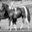

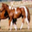

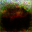

In [23]:
-- torch.getnumthreads()
index = 115
itorch.image(data[index])
itorch.image(label[index])
s = model:forward(data[index])
-- print(s:size())
itorch.image(s:resize(3,32,32))

In [33]:
-- print(data[index])
-- print(label[index])
-- print(s:resize(3,32,32))
-- torch.tanh(-1)

-0.76159415595576	


In [11]:
torch.getnumthreads()


1	


In [9]:
torch.setnumthreads(4)
